## Initialization

In [1]:
import cv2
import numpy as np
import mahotas
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from collections import Counter

## Training

In [1]:
image = cv2.imread('cal7.jpg')
cmeans = cv2.mean(image)
cmeans = cmeans[:3]
cmeans

NameError: name 'cv2' is not defined

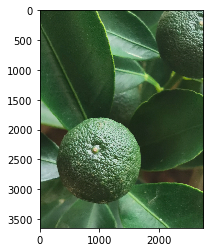

In [2]:
img=mpimg.imread('cal7.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
image1 = cv2.imread('cal1.jpg')
cmeans1 = cv2.mean(image1)
cmeans1 = cmeans1[:3]
cmeans1

In [ ]:
cv2.imshow('image',image1)

In [ ]:
image1 = cv2.imread('cal2.jpg')
cmeans2 = cv2.mean(image1)
cmeans2 = cmeans2[:3]
cmeans2

In [ ]:
image1 = cv2.imread('cal4.jpg')
cmeans3 = cv2.mean(image1)
cmeans3 = cmeans3[:3]
cmeans3

In [ ]:
image1 = cv2.imread('cal8.jpg')
cmeans4 = cv2.mean(image1)
cmeans4 = cmeans4[:3]
cmeans4

In [ ]:
image1 = cv2.imread('cal9.jpg')
cmeans5 = cv2.mean(image1)
cmeans5 = cmeans5[:3]
cmeans5

In [ ]:
image1 = cv2.imread('cal10.jpg')
cmeans6 = cv2.mean(image1)
cmeans6 = cmeans6[:3]
cmeans6

In [ ]:
image1 = cv2.imread('cal11.jpg')
cmeans7 = cv2.mean(image1)
cmeans7 = cmeans7[:3]
cmeans7

In [ ]:
image2 = cv2.imread('orange1.jpg')
omeans = cv2.mean(image2)
omeans = omeans[:3]
omeans

In [ ]:
image3 = cv2.imread('orange2.png')
omeans1 = cv2.mean(image3)
omeans1 = omeans1[:3]
omeans1

In [ ]:
image3 = cv2.imread('orange4.jpg')
omeans2 = cv2.mean(image3)
omeans2 = omeans2[:3]
omeans2

In [ ]:
image3 = cv2.imread('orange5.jpeg')
omeans3 = cv2.mean(image3)
omeans3 = omeans3[:3]
omeans3

## Testing

In [ ]:
image2 = cv2.imread('orange3.jpg')
otmeans = cv2.mean(image2)
otmeans = otmeans[:3]
otmeans

In [ ]:
image2 = cv2.imread('cal5.jpg')
ctmeans = cv2.mean(image2)
ctmeans = ctmeans[:3]
ctmeans

In [ ]:
image2 = cv2.imread('cal6.jpg')
ctmeans1 = cv2.mean(image2)
ctmeans1 = ctmeans1[:3]
ctmeans1

## SVM

In [ ]:
X = np.array([cmeans, cmeans1, cmeans2, cmeans3, cmeans4,
             cmeans5, cmeans6, cmeans7, omeans, omeans1, omeans2
             , omeans3])
y = [1,1,1,1,1,1,1,1,0,0,0,0]
clf = svm.SVC(kernel='linear', C = 1.0) 

In [ ]:
clf.fit(X,y)

In [ ]:
predict = [ctmeans,ctmeans1,otmeans]

for count in predict:
    print(clf.predict([count]))

## ANN

In [ ]:
#Independent variables
input_set = np.array([cmeans, cmeans1, cmeans2, cmeans3, cmeans4,
             cmeans5, cmeans6, cmeans7, omeans, omeans1, omeans2
             , omeans3])
#Dependent variable
labels = np.array([1,1,1,1,1,1,1,1,0,0,0,0])
labels = labels.reshape(12,1) #to convert labels to vector, number of inputs to output

In [ ]:
np.random.seed(42)
weights = np.random.rand(3,1) #size of matrix to 1
bias = np.random.rand(1) 
lr = .05 #learning rate

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:
for train in range(40000):
    inputs = input_set
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)
    error = z - labels
    print(error.sum())
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_set.T
    weights = weights - lr*np.dot(inputs, z_del)
    
    for num in z_del:
        bias = bias - lr*num

In [ ]:
predict = [ctmeans,ctmeans1,otmeans]

for count in predict:
    single_pt = np.array([count])
    result = sigmoid(np.dot(single_pt, weights) + bias)
    print(result)